In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tempering
!mkdir pan_card_tempering/image

In [ ]:
# Open image and display
original = Image.open(requests.get('https://i0.wp.com/c1.staticflickr.com/9/8212/8287786598_c4de1903c3_b.jpg?resize=650,400', stream=True).raw)
tampered = Image.open(requests.get('https://i.pinimg.com/564x/e8/e4/46/e8e446b1c9cdf2559ccc1d077b674acc.jpg', stream=True).raw) 

In [ ]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (650, 400)
Tampered image size :  (500, 316)


In [ ]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('/content/pan_card_tempering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('/content/pan_card_tempering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


In [ ]:
# Change image type if required from png to jpg
tampered = Image.open('/content/pan_card_tempering/image/tampered.png')
tampered.save('/content/pan_card_tempering/image/tampered.png')#can do png to jpgcontent

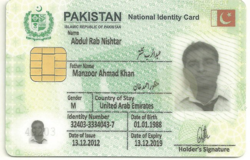

In [ ]:
original

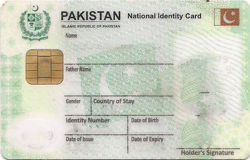

In [ ]:
tampered

In [ ]:
# load the two input images
original = cv2.imread('/content/pan_card_tempering/image/original.png')
tampered = cv2.imread('/content/pan_card_tempering/image/tampered.png')

In [ ]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.270002996021036


In [ ]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


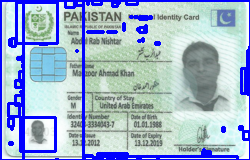

In [ ]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


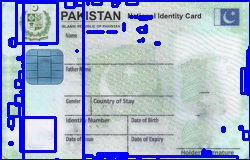

In [ ]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


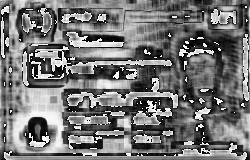

In [ ]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


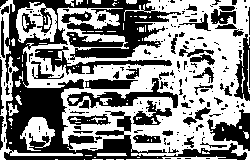

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)